In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import random

import matplotlib.pyplot as plt
import torch

import promonet

/home/mrm5248/micromamba/envs/promonet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
stems = promonet.load.partition('vctk')['train']

In [4]:
files = [promonet.CACHE_DIR / 'vctk' / f'{stem}-100-spectrogram.pt' for stem in stems]

In [12]:
random.shuffle(files)

In [13]:
selected = files[:1000]

In [14]:
promonet.DYNAMIC_RANGE_COMPRESSION_THRESHOLD = None

In [15]:
values = torch.cat([
    promonet.preprocess.spectrogram.linear_to_mel(torch.load(file)).flatten()
    for file in selected])

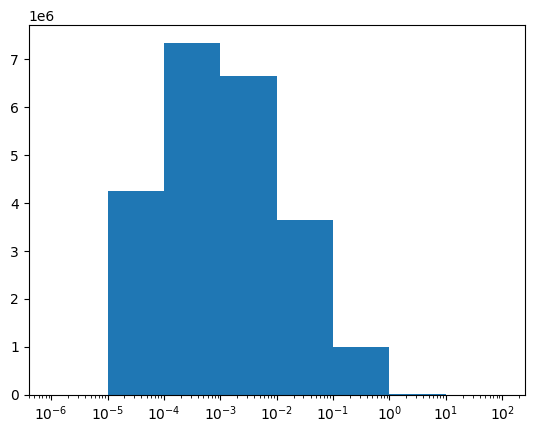

In [16]:
plt.hist(torch.exp(values), bins=torch.logspace(start=-6, end=2, steps=9))
plt.xscale('log')

In [17]:
torch.exp(values).min()

tensor(4.5803e-05)

In [20]:
torch.exp(values).max()

tensor(7.2609)

In [18]:
values.min()

tensor(-9.9912)

In [19]:
values.max()

tensor(1.9825)